In [1]:
# K-means is part of unsupervised mechine learning.
# The data is not label, no target, no output So, we first label the data and than we perform various 
# operations,It will cluster the data or label the data cluster means grouping the data based on their similarity

# K-means, K-nearesr neighbore, principle component analysis to reduce dimension (PCA), linear discremination analysis(LDA)--->
# part of unsupervised ML.It give information about no. of cluster or centroid

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Import of dataset

In [67]:
df = pd.read_csv('Cricket.csv', encoding='latin')   # encoding--->If we open the file in excel and it does not open properly
                                                 # so to work with data we use different encoding without we get error

In [68]:
# Whatever dataset that we have, they are mostly made in excel or spreadsheet 
# Whenever we work with a dataset that is made in some other format,than we apply encoding(utf, unicode, latin)

# Basic pandas method

In [5]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [6]:
df.shape 

(79, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [8]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [9]:
df.isnull().sum()     #checking the null values

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [10]:
# to convert the span into years of experience
# we first split the span coluumn into start  and end than store in new column

In [71]:
df[['start','end']]=df.Span.str.split("-", expand=True)   #str--->span column is in string format
                                                          #"-"--->dividing data into before "-" and after "-" this
                                                          #expand--->It will permanently make data in two column start and end

In [70]:
# 1989-2012
# start    1989
# end      2012

In [13]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [14]:
# previously we made 2 more column---->start and end 
# Now we will be making one more column--->exp  = end-start
# Now, how many no. of extra columns that we have created = 3
# convert tham  as integer
# find years of experience as end year-start year
# later drop the unneceassary columns such as start, end and span
# we are only left with experience column now
# If we split the columns having string tha the splited columns will also have string 
# so before substracting we have to convert it into integer or float

In [15]:
df[['start','end']]=df[['start','end']].astype(int)

In [16]:
#values is now being converted into integer
df['exp']=df['end']-df['start']
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end,exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [17]:
df=df.drop(['start','end','Span'], axis=1)   #axis=1 (column-wise)   axis=0 (row-wise)
# other method---> df.drop(['start','end','Span'], axis=1, inplace=True)
#slicing is not available for integer values, in spliting we perform slicing but without index values

In [18]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


# check for outliers

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  exp     79 non-null     int32  
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 7.8+ KB


In [20]:
# We cannot directly convert these string values into integer, because '*' present along with the values
df.HS=df.HS.str.extract('(\d+)')    # also lamda function can be used
                                      # Extracting only the numbers--->'\d' means number,  '*' means ignore

In [21]:
df.HS = df.HS.astype(int)     #Converting the dtype from string to integer
                              #S.str.extract(r'([ab])(\d)') with this number and letter both extract in different columns
                             # click on function and click on shift+tab revelant information about that function you will get

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int32  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  exp     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 7.5+ KB


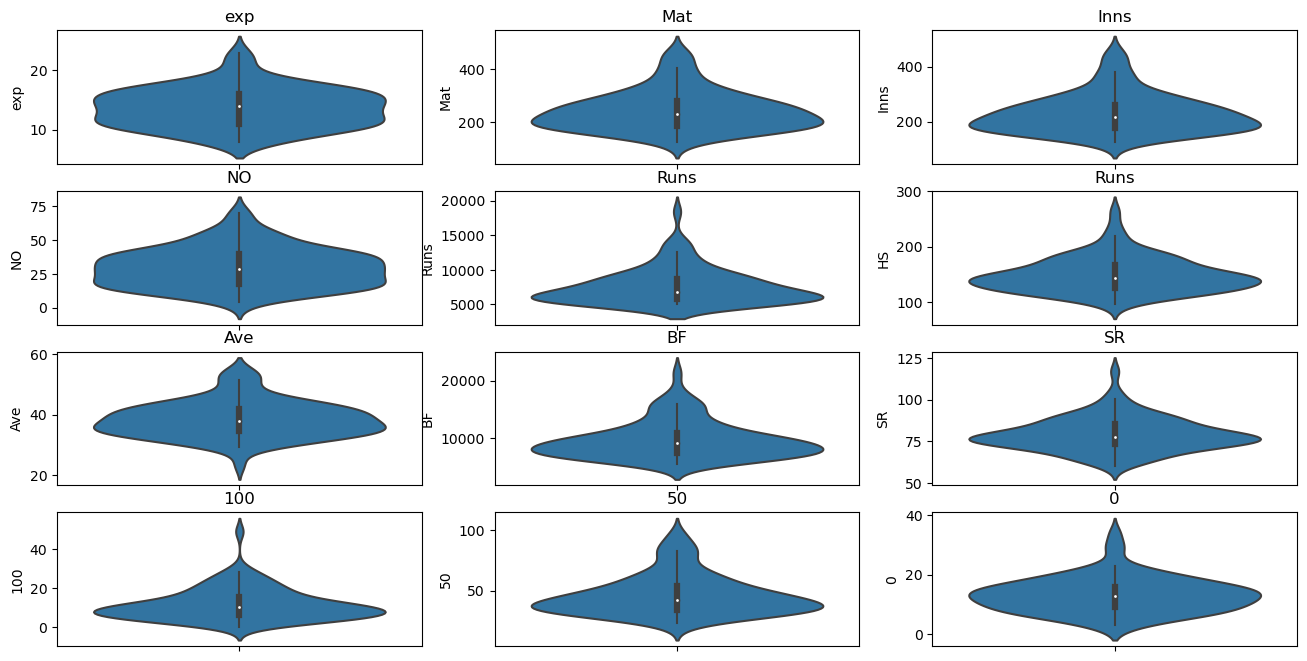

In [23]:
# In violin plot we can check for outlier and distribution of data violin plot---> combination of box plot and distribution 
f,axes = plt.subplots(4,3,figsize=(16,8))
s = sns.violinplot(y=df.exp,ax=axes[0,0])
axes[0,0].set_title('exp')
s = sns.violinplot(y=df.Mat,ax=axes[0,1])
axes[0,1].set_title('Mat')
s = sns.violinplot(y=df.Inns,ax=axes[0,2])
axes[0,2].set_title('Inns')

s = sns.violinplot(y=df.NO,ax=axes[1,0])
axes[1,0].set_title('NO')
s = sns.violinplot(y=df.Runs,ax=axes[1,1])
axes[1,1].set_title('Runs')
s = sns.violinplot(y=df.HS,ax=axes[1,2])
axes[1,2].set_title('Runs')

s = sns.violinplot(y=df.Ave,ax=axes[2,0])
axes[2,0].set_title('Ave')
s = sns.violinplot(y=df.BF,ax=axes[2,1])
axes[2,1].set_title('BF')
s = sns.violinplot(y=df.SR,ax=axes[2,2])
axes[2,2].set_title('SR')

s = sns.violinplot(y=df['100'],ax=axes[3,0])
axes[3,0].set_title('100')
s = sns.violinplot(y=df['50'],ax=axes[3,1])
axes[3,1].set_title('50')
s = sns.violinplot(y=df['0'],ax=axes[3,2])
axes[3,2].set_title('0')
plt.show()

In [24]:
# col_name =list(df.columns)
# for i in col_name:
#     if df[i].dtype!='object':
#         sns.violinplot(y=df[i])
#         plt.show()        

### Removing of outliers

In [25]:
Q3 = df.Mat.quantile(0.99)
Q1 = df.Mat.quantile(0.01)
df['Mat'][df['Mat']<=Q1]=Q1
df['Mat'][df['Mat']>=Q3]=Q3

Q3 = df.Inns.quantile(0.99)
Q1 = df.Inns.quantile(0.01)
df['Inns'][df['Inns']<=Q1]=Q1
df['Inns'][df['Inns']>=Q3]=Q3

Q3 = df.NO.quantile(0.99)
Q1 = df.NO.quantile(0.01)
df['NO'][df['NO']<=Q1]=Q1
df['NO'][df['NO']>=Q3]=Q3

Q3 = df.HS.quantile(0.99)
Q1 = df.HS.quantile(0.01)
df['HS'][df['HS']<=Q1]=Q1
df['HS'][df['HS']>=Q3]=Q3

Q3 = df.Runs.quantile(0.99)
Q1 = df.Runs.quantile(0.01)
df['Runs'][df['Runs']<=Q1]=Q1
df['Runs'][df['Runs']>=Q3]=Q3

Q3 = df.Ave.quantile(0.99)
Q1 = df.Ave.quantile(0.01)
df['Ave'][df['Ave']<=Q1]=Q1
df['Ave'][df['Ave']>=Q3]=Q3

Q3 = df.BF.quantile(0.99)
Q1 = df.BF.quantile(0.01)
df['BF'][df['BF']<=Q1]=Q1
df['BF'][df['BF']>=Q3]=Q3

Q3 = df.SR.quantile(0.99)
Q1 = df.SR.quantile(0.01)
df['SR'][df['SR']<=Q1]=Q1
df['SR'][df['SR']>=Q3]=Q3

Q3 = df['100'].quantile(0.99)
Q1 = df['100'].quantile(0.01)
df['100'][df['100']<=Q1]=Q1
df['100'][df['100']>=Q3]=Q3

Q3 = df['50'].quantile(0.99)
Q1 = df['50'].quantile(0.01)
df['50'][df['50']<=Q1]=Q1
df['50'][df['50']>=Q3]=Q3

Q3 = df['0'].quantile(0.99)
Q1 = df['0'].quantile(0.01)
df['0'][df['0']<=Q1]=Q1
df['0'][df['0']>=Q3]=Q3

Q3 = df.exp.quantile(0.99)
Q1 = df.exp.quantile(0.01)
df['exp'][df['exp']<=Q1]=Q1
df['exp'][df['exp']>=Q3]=Q3



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13036\2531896654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mat'][df['Mat']<=Q1]=Q1
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13036\2531896654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inns'][df['Inns']<=Q1]=Q1
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13036\2531896654.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NO'][df['NO']<=Q1]=Q1
C:\Users\LEN

Text(0.5, 1.0, '0')

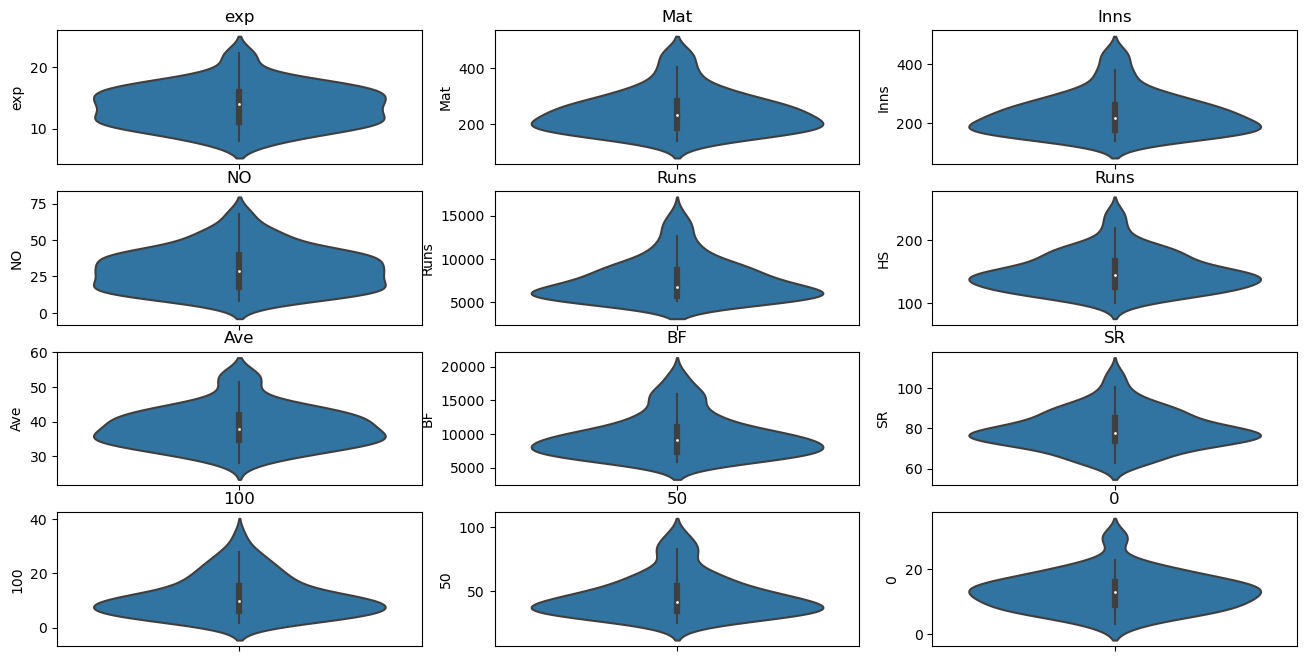

In [26]:
f,axes=plt.subplots(4,3,figsize=(16,8))
s=sns.violinplot(y=df.exp,ax=axes[0,0])
axes[0,0].set_title('exp')
s = sns.violinplot(y=df.Mat,ax=axes[0,1])
axes[0,1].set_title('Mat')
s = sns.violinplot(y=df.Inns,ax=axes[0,2])
axes[0,2].set_title('Inns')

s = sns.violinplot(y=df.NO,ax=axes[1,0])
axes[1,0].set_title('NO')
s = sns.violinplot(y=df.Runs,ax=axes[1,1])
axes[1,1].set_title('Runs')
s = sns.violinplot(y=df.HS,ax=axes[1,2])
axes[1,2].set_title('Runs')

s = sns.violinplot(y=df.Ave,ax=axes[2,0])
axes[2,0].set_title('Ave')
s = sns.violinplot(y=df.BF,ax=axes[2,1])
axes[2,1].set_title('BF')
s = sns.violinplot(y=df.SR,ax=axes[2,2])
axes[2,2].set_title('SR')

s = sns.violinplot(y=df['100'],ax=axes[3,0])
axes[3,0].set_title('100')
s = sns.violinplot(y=df['50'],ax=axes[3,1])
axes[3,1].set_title('50')
s = sns.violinplot(y=df['0'],ax=axes[3,2])
axes[3,2].set_title('0')


In [27]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,SR Tendulkar (INDIA),451.30,437.18,41.0,15156.24,200.00,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,KC Sangakkara (Asia/ICC/SL),404.00,380.00,41.0,14234.00,169.00,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,RT Ponting (AUS/ICC),375.00,365.00,39.0,13704.00,164.00,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,ST Jayasuriya (Asia/SL),445.00,433.00,18.0,13430.00,189.00,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,DPMD Jayawardene (Asia/SL),448.00,418.00,39.0,12650.00,144.00,33.37,16020.00,78.96,19.00,77.00,28.00,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),142.04,139.48,13.0,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.00,16.00
75,Misbah-ul-Haq (PAK),162.00,149.00,31.0,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.00,13.00
76,PD Collingwood (ENG),197.00,181.00,37.0,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.00,10.00
77,A Symonds (AUS),198.00,161.00,33.0,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.00,11.00


In [28]:
# Player name is important for us to determine the player
# For model, it is not important
# Just for having the original dataset with player columns in it 
# I will creat a copy of the dataset and then will drop the player columns
# Now we can fetch the copy of the dataset without player columns into our model

In [29]:
df_drop = df.copy()    #To our understanding we creat copy 
player = df_drop.pop('Player')  #model does not require player name just index no. is enough 
# another way => player =df_drop.pop(['player'], axis=1)

In [30]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,SR Tendulkar (INDIA),451.30,437.18,41.0,15156.24,200.00,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,KC Sangakkara (Asia/ICC/SL),404.00,380.00,41.0,14234.00,169.00,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,RT Ponting (AUS/ICC),375.00,365.00,39.0,13704.00,164.00,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,ST Jayasuriya (Asia/SL),445.00,433.00,18.0,13430.00,189.00,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,DPMD Jayawardene (Asia/SL),448.00,418.00,39.0,12650.00,144.00,33.37,16020.00,78.96,19.00,77.00,28.00,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),142.04,139.48,13.0,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.00,16.00
75,Misbah-ul-Haq (PAK),162.00,149.00,31.0,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.00,13.00
76,PD Collingwood (ENG),197.00,181.00,37.0,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.00,10.00
77,A Symonds (AUS),198.00,161.00,33.0,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.00,11.00


In [31]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


In [32]:
player

0            SR Tendulkar (INDIA)
1     KC Sangakkara (Asia/ICC/SL)
2            RT Ponting (AUS/ICC)
3         ST Jayasuriya (Asia/SL)
4      DPMD Jayawardene (Asia/SL)
                 ...             
74              CG Greenidge (WI)
75            Misbah-ul-Haq (PAK)
76           PD Collingwood (ENG)
77                A Symonds (AUS)
78        Abdul Razzaq (Asia/PAK)
Name: Player, Length: 79, dtype: object

In [33]:
df['NO'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0     41.0
1     41.0
2     39.0
3     18.0
4     39.0
      ... 
74    13.0
75    31.0
76    37.0
77    33.0
78    57.0
Name: NO, Length: 79, dtype: float64>

In [34]:
df['NO'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0     41.0
1     41.0
2     39.0
3     18.0
4     39.0
      ... 
74    13.0
75    31.0
76    37.0
77    33.0
78    57.0
Name: NO, Length: 79, dtype: float64>

In [35]:
# The dataset which we have contain very much scattered values
# 17,25,50,78
# range1=17-25
# range2=25-50
# standardizaton---> Feature scaling process
# It will bring all the scattered values in some range
# Z-test---> X-mean/sd
# mean=0, std=1

In [36]:
import sklearn

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
Scaler = StandardScaler()

In [39]:
df_scaled = Scaler.fit_transform(df_drop)     #we are fetching df_drop data for standaredization

In [40]:
df_scaled

array([[ 2.82279967e+00,  2.99188395e+00,  7.72431175e-01,
         3.18356123e+00,  1.69403032e+00,  1.08826122e+00,
         2.98241352e+00,  7.49179671e-01,  3.13264038e+00,
         2.92935542e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17526315e+00,  2.16409181e+00,  7.72431175e-01,
         2.79619505e+00,  6.63399607e-01,  5.92157985e-01,
         2.74368859e+00, -3.56865202e-02,  1.87083605e+00,
         2.88840881e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77825344e+00,  1.94693753e+00,  6.31248299e-01,
         2.57358047e+00,  4.97168847e-01,  6.00861551e-01,
         2.41609488e+00,  1.27250423e-01,  2.55809331e+00,
         2.20596529e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73655274e+00,  2.93137029e+00, -8.51171904e-01,
         2.45849293e+00,  1.32832265e+00, -1.08240802e+00,
         1.65726753e+00,  1.27845850e+00,  2.28319041e+00,
         1.33740082e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77762271e+00,  2.71421601e+00,  6.3124829

In [41]:
df_df1=pd.DataFrame(df_scaled,columns=['Mat','Inns','NO','Runs','HS','Ave','BF','SR','100','50','0','exp']) #order must be same as before
#df_scaled data is in array format to convert it into readable formate

In [42]:
df_df1.head()    #It will label the unlabeled data 

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


In [43]:
# Whanever we want to perform clustering, then always remember that we should not fetch the data 
# which is very much scattered to K-means model

### Implementing K-means

In [44]:
from sklearn.cluster import KMeans

In [45]:
clusters = list(range(2,10))        #2,3,4,5,6,7,8,9,10

In [46]:
# The most feasiable no. of cluster to provide is from 2-10 
# try and test methode

In [47]:
wcss = []
for i in clusters:
    model_clus=KMeans(n_clusters=i)
    model_clus.fit(df_df1)
    wcss.append(model_clus.inertia_)    #inertia_ ---> is a distance from the centroid with respect to data points 

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

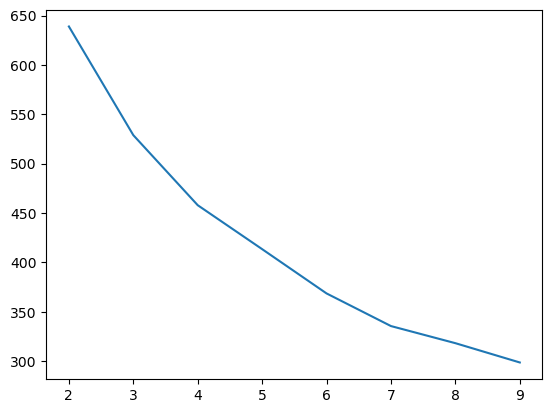

In [48]:
plt.plot(clusters,wcss)

In [49]:
clusters = KMeans(n_clusters=4)
#we can either go with 4 or 6 as our dataset is small we go with 4 if dataset was large than we can go with 6 
clusters.fit(df_df1)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [50]:
df['clusters_Id']=clusters.labels_
#Labels(n=4)----->0,1,2,3
#0-->1st cluster, 1-->2nd cluster, 2--->3rd cluster, 3--->4th cluster

In [51]:
df.head()
# In original dataframe (df) we inserted one more column called cluster_Id. it will have label of cluster

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,clusters_Id
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,2
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,2
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,2
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,2
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,2


In [52]:
df.tail()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,clusters_Id
74,CG Greenidge (WI),142.04,139.48,13.0,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.0,16.0,0
75,Misbah-ul-Haq (PAK),162.00,149.00,31.0,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.0,13.0,0
76,PD Collingwood (ENG),197.00,181.00,37.0,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.0,10.0,0
77,A Symonds (AUS),198.00,161.00,33.0,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.0,11.0,0
78,Abdul Razzaq (Asia/PAK),265.00,228.00,57.0,5086.24,112.00,29.70,6252.00,81.25,3.00,25.34,14.0,15.0,0


In [53]:
#ICC---> lowest NO, highest average, highest strike rate 
# For finding the best player in each and every cluster 

In [54]:
df[df['clusters_Id']==0].sort_values(by=['Ave','NO','SR'],ascending=[False,True,False]).head()
#Avg is taken in descending order, NO--->ascending order, SR--->descending order

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,clusters_Id
38,MG Bevan (AUS),232.00,196.00,67.0,6912.0,108.0,53.58,9320.0,74.16,6.0,46.0,5.0,10.0,0
64,MEK Hussey (AUS),185.00,157.00,44.0,5442.0,109.0,48.15,6243.0,87.16,3.0,39.0,3.0,8.0,0
74,CG Greenidge (WI),142.04,139.48,13.0,5134.0,133.0,45.03,7908.0,64.92,11.0,31.0,3.0,16.0,0
51,DM Jones (AUS),164.00,161.00,25.0,6068.0,145.0,44.61,8362.0,72.56,7.0,46.0,6.0,10.0,0
46,LRPL Taylor (NZ),190.00,176.00,29.0,6486.0,131.0,44.12,7906.0,82.03,17.0,37.0,9.0,11.0,0


In [55]:
df[df['clusters_Id']==1].sort_values(by=['Ave','NO','SR'],ascending=[False,True,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,clusters_Id
13,MS Dhoni (Asia/INDIA),295.0,255.0,67.66,9496.0,183.0,51.32,10706.0,88.69,10.0,64.0,8.0,13.0,1
29,MJ Clarke (AUS),245.0,223.0,44.00,7981.0,130.0,44.58,10104.0,78.98,8.0,58.0,10.0,12.0,1
11,Mohammad Yousuf (Asia/PAK),288.0,273.0,40.00,9720.0,141.0,41.71,12942.0,75.10,15.0,64.0,15.0,12.0,1
32,Javed Miandad (PAK),233.0,218.0,41.00,7381.0,119.0,41.70,11014.0,67.01,8.0,50.0,8.0,21.0,1
19,S Chanderpaul (WI),268.0,251.0,40.00,8778.0,150.0,41.60,12408.0,70.74,11.0,59.0,6.0,17.0,1


In [56]:
df[df['clusters_Id']==2].sort_values(by=['Ave','NO','SR'],ascending=[False,True,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,clusters_Id
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.0,22.22,2
6,JH Kallis (Afr/ICC/SA),328.0,314.00,53.0,11579.00,139.0,44.36,15885.00,72.89,17.00,86.00,17.0,18.00,2
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.0,17.00,2
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.0,15.00,2
7,SC Ganguly (Asia/INDIA),311.0,300.00,23.0,11363.00,183.0,41.02,15416.00,73.70,22.00,72.00,16.0,15.00,2


In [57]:
df[df['clusters_Id']==3].sort_values(by=['Ave','NO','SR'],ascending=[False,True,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,clusters_Id
25,V Kohli (INDIA),188.0,180.0,29.0,8146.0,183.0,53.6592,8952.0,90.99,27.0,43.0,11.0,9.0,3
15,AB de Villiers (Afr/SA),222.0,213.0,39.0,9319.0,162.0,53.5500,9295.0,100.25,24.0,53.0,7.0,12.0,3
34,HM Amla (SA),156.0,153.0,10.0,7186.0,159.0,50.2500,8069.0,89.05,25.0,33.0,3.0,9.0,3
42,IVA Richards (WI),187.0,167.0,24.0,6721.0,189.0,47.0000,7451.0,90.20,11.0,45.0,7.0,16.0,3
49,ML Hayden (AUS/ICC),161.0,155.0,15.0,6133.0,181.0,43.8000,7767.0,78.96,10.0,36.0,9.0,15.0,3


In [58]:
df[df['clusters_Id']==0].shape

(31, 14)

In [59]:
df[df['clusters_Id']==1].shape

(29, 14)

In [60]:
df[df['clusters_Id']==2].shape

(9, 14)

In [61]:
df[df['clusters_Id']==3].shape

(10, 14)

In [65]:
df.sort_values(by = ['Ave','SR','100'], ascending = [False,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,clusters_Id
25,V Kohli (INDIA),188.0,180.0,29.00,8146.0,183.0,53.6592,8952.0,90.99,27.0,43.0,11.0,9.0,3
38,MG Bevan (AUS),232.0,196.0,67.00,6912.0,108.0,53.5800,9320.0,74.16,6.0,46.0,5.0,10.0,0
15,AB de Villiers (Afr/SA),222.0,213.0,39.00,9319.0,162.0,53.5500,9295.0,100.25,24.0,53.0,7.0,12.0,3
13,MS Dhoni (Asia/INDIA),295.0,255.0,67.66,9496.0,183.0,51.3200,10706.0,88.69,10.0,64.0,8.0,13.0,1
34,HM Amla (SA),156.0,153.0,10.00,7186.0,159.0,50.2500,8069.0,89.05,25.0,33.0,3.0,9.0,3
